# import libraries

You need many libaries for data science work.  Below we import some more common ones, if those work, most likely the others will work too.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

# Now some examples

Example code that uses different data structures and does plotting

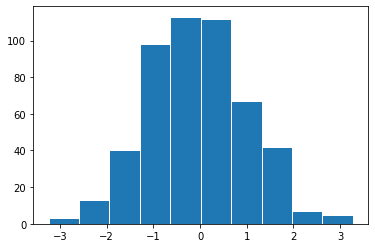

In [2]:
# plot 500 random normal numbers
n = 500
x = np.random.normal(size=n)
a = plt.hist(x, edgecolor="w")

In [3]:
# Create a data frame with correlated x and y variables
df = pd.DataFrame( {'x':x, 'y': x + np.random.normal(size=n)})
print(df.head())

          x         y
0  0.306705 -2.268047
1 -1.473304 -0.325482
2  0.465910  2.212184
3 -1.020168 -0.782928
4 -2.280090 -2.344413


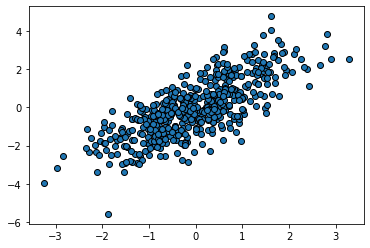

In [4]:
a = plt.scatter(df.x, df.y, edgecolor='k')

# Do some predictive modeling

Above you loaded some of the modeling libraries.  But do they actually work?

Create and plot data.  You should see colors in a spiral pattern below.

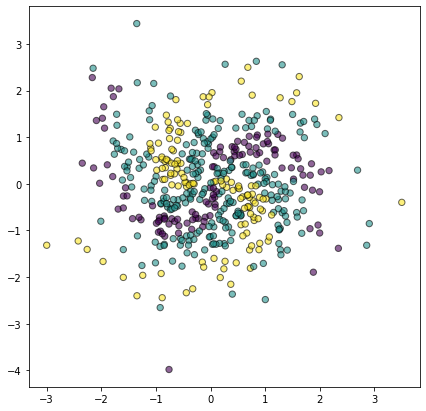

In [5]:
n = 500  # how many points
x1 = np.random.normal(size=n)
x2 = np.random.normal(size=n)
alpha = np.arctan2(x2, x1)
r = np.sqrt(x1**2 + x2**2)
c1 = (np.sin(2*alpha + 2*r) > 0).astype('int')
c2 = (np.cos(2*alpha + 2*r) > 0).astype('int')
c = c1 + c2  # this is your target
# features, target:
X = np.column_stack((x1,x2))
y = c
# this is how the data looks like:
plt.figure(figsize=(7,7))
plt.scatter(x1, x2, c=c, s=40, edgecolors='k', alpha=0.6)
plt.show()


## And use sklearns multiplayer perceptron for modeling

Perceptron in a simple neural network.  Can we capture the multicolor spiral structure?  Note: it may take a little time.

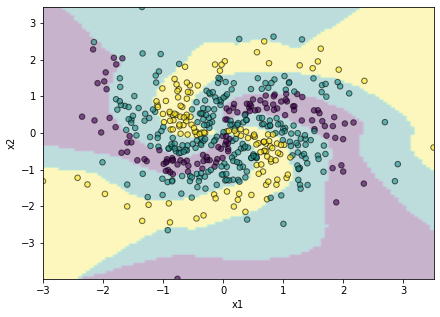

In [6]:
m = MLPClassifier(hidden_layer_sizes = (200, 150, 100, 100),
                  activation="relu",
                  alpha=0.01,
                  max_iter=10000).fit(X, y)

# Predict and plot: take this code as black box
range1 = np.linspace(X[:,0].min(), X[:,0].max(), 100)
range2 = np.linspace(X[:,1].min(), X[:,1].max(), 100)
(xx1, xx2) = np.meshgrid(range1, range2)
Xgrid = np.column_stack((xx1.ravel(), xx2.ravel()))
yhat = m.predict(Xgrid)
plt.figure(figsize=(7,5))
# plot the predicted values on grid as an image
plt.imshow(yhat.reshape((100,100)),
           alpha=0.3, extent=[xx1.min(), xx1.max(), xx2.min(), xx2.max()],
           origin='lower', aspect='auto')
# add the actual values
plt.scatter(X[:,0], X[:,1], c=y, s=30, alpha=0.6, edgecolor="k")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()
